In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset (downloaded the dataset from kaggle.com)
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#The dataset contains transactions made by credit cards in September 2013 by European cardholders.
#This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
#The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
#It contains only numerical input variables which are the result of a PCA transformation.
#Unfortunately, due to confidentiality issues, we cannot provide the original features and more background
#information about the data. Features V1, V2, … V28 are the principal components obtained with PCA
#the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
#Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
#The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
#Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#There are 30 featues and 1 target data. 
#There are 284807 values. 
#There are no null values.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# let us find the correlation. 
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


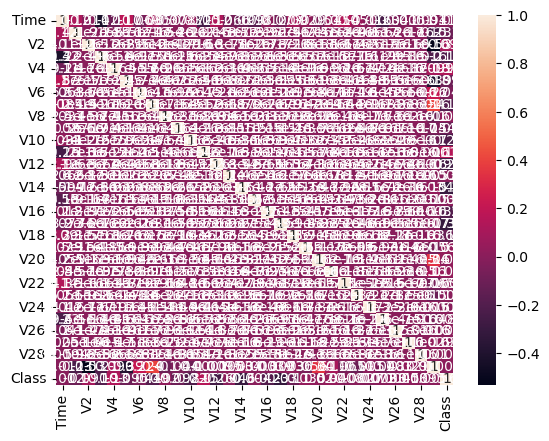

<Figure size 3500x3500 with 0 Axes>

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(35,35))
plt.show()

In [14]:
df.shape

(284807, 31)

In [15]:
#display first five rows
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#All the values are in the same range except for amount column.
# we will use standard scalar for feature scaling only for amount column. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [23]:
#Let us check the distribution of our target data.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

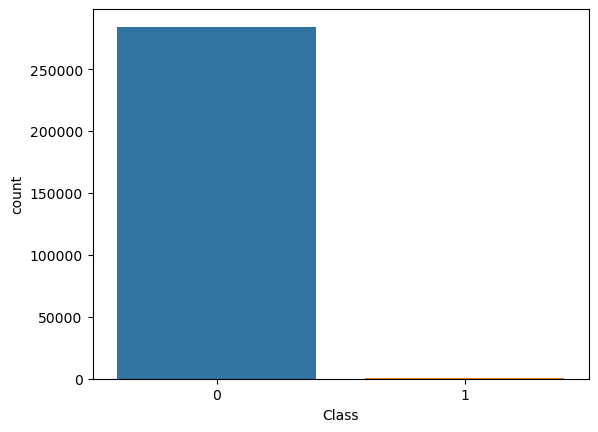

In [24]:
sns.countplot(x = df['Class'])

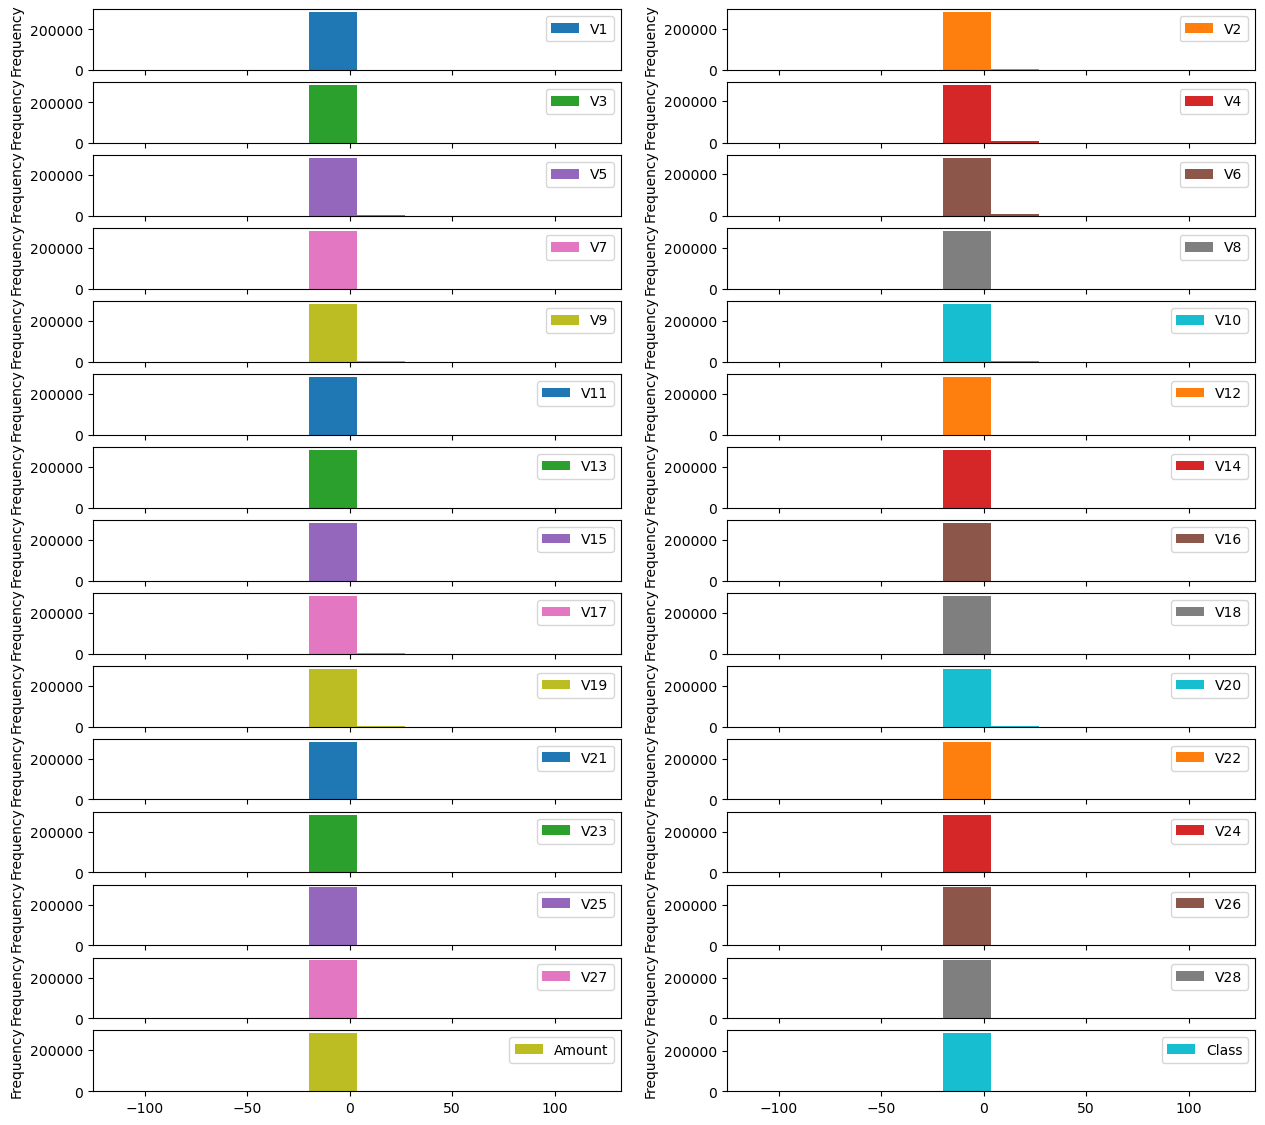

In [27]:
plt.rcParams['figure.figsize'] = (15,15)
df.plot(kind='hist',subplots=True,layout=(16,2))
plt.show()

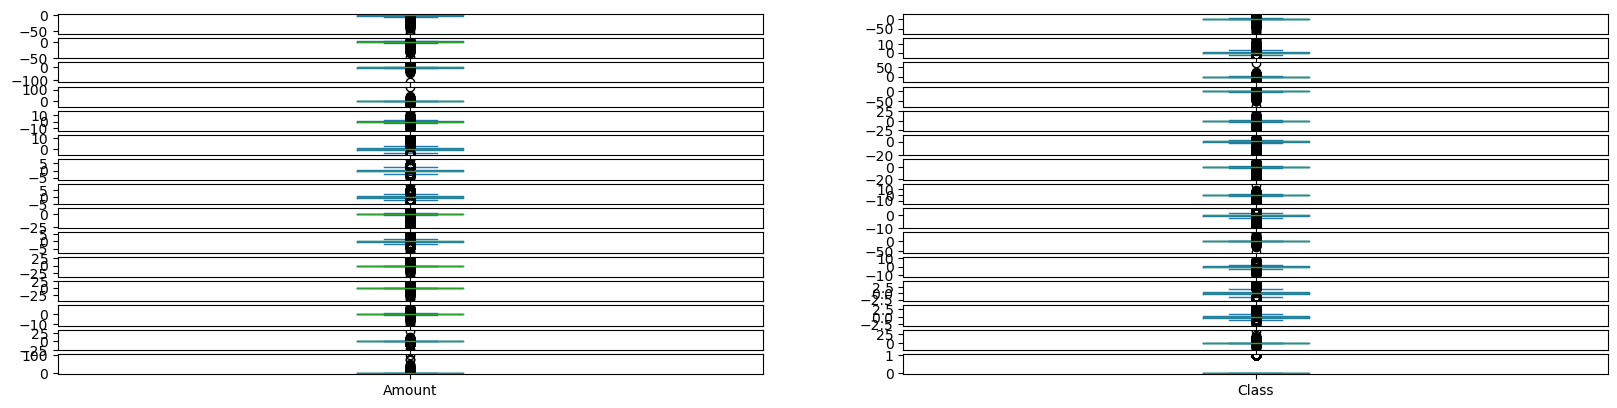

In [28]:
plt.rcParams['figure.figsize'] = (20,5)
df.plot(kind='box',subplots=True,layout=(16,2))
plt.show()

In [34]:
#This shows that our dataset is highly imbalanced. Need to handle the imbalanced datset by the method undersampling
#hence we need to balance our dataset. 
#handling imbalanced dataset.
#undersampling - We will randomly delete the rows from the majority class to balance that with the minority class
#build a sample dataset containing similar distribution of normal transactions and fraudulent transactions.

In [35]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [36]:
normal.shape

(284315, 30)

In [37]:
fraud.shape

(492, 30)

In [38]:
normal_sample = normal.sample(n=492)
normal_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115786,1.161465,-0.053200,0.781972,0.401208,-0.442579,0.253524,-0.535719,0.248403,0.157664,0.045165,1.289015,0.822965,0.007019,0.285089,0.900159,0.580229,-0.627945,0.038074,-0.268549,-0.104670,-0.030212,-0.088636,0.070826,-0.292124,0.097438,0.246220,0.004999,0.009396,-0.329281,0
259767,0.078826,1.268754,-0.760956,0.209826,1.399641,-0.564724,1.236591,-0.431729,-0.034915,-1.239081,-0.363458,-0.356458,0.317599,-3.032369,-0.331743,-0.145305,2.081275,0.775726,0.435846,0.117935,0.082639,0.697496,-0.287076,0.491141,-0.578063,0.658725,-0.082998,0.044408,-0.304013,0
135155,1.003538,0.304661,-0.352938,1.330809,0.143376,-0.411607,0.184431,0.093809,-0.278199,-0.408602,1.793436,0.061977,-1.374472,-0.571273,0.722086,0.551161,0.796176,0.528002,-0.646526,-0.054247,-0.091860,-0.463472,-0.057302,-0.151294,0.390339,-0.457355,0.019605,0.051365,-0.049375,0
243542,1.974377,-0.364675,-0.210612,0.529123,-0.780923,-0.613348,-0.558602,-0.098158,1.382373,-0.182199,-0.881938,0.792882,0.684299,-0.311015,0.410419,0.043107,-0.526461,0.122554,-0.241308,-0.185471,0.201213,0.867309,0.113445,0.087308,-0.078986,-0.217684,0.045504,-0.034921,-0.313289,0
260560,-1.029032,1.468947,0.111734,1.133079,1.692260,-0.906488,1.367355,-0.259455,-1.062655,-0.717306,-0.084936,0.074064,0.459940,-1.235052,-0.008877,-0.867160,1.501445,0.088361,0.553252,0.220377,-0.037385,0.137409,-0.567816,1.009018,1.164295,-0.236174,0.196072,0.173777,-0.282183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192213,-0.353295,0.673990,1.026418,-0.783921,0.637150,0.873492,0.289482,0.270054,0.126775,-0.592732,-0.001626,0.576895,0.316061,-0.031327,-0.037981,0.365815,-0.991980,0.728940,0.901211,-0.019927,-0.081829,-0.240712,-0.090423,-0.240555,-0.517782,-0.587882,0.057700,0.166408,-0.300015,0
79624,1.057697,-0.229504,1.345268,1.137442,-1.048488,0.141186,-0.835985,0.278253,0.843457,-0.091713,-0.422352,-0.234361,-0.735333,0.060173,1.940745,0.519086,-0.433226,0.275671,-1.151504,-0.133275,0.288727,0.814186,-0.056880,0.070664,0.252626,-0.225285,0.081051,0.043747,-0.193346,0
93230,0.216671,-2.378674,-0.467878,-0.098959,-1.382193,-0.207425,0.300026,-0.130559,-1.034000,0.506671,1.250165,0.451563,-0.602900,0.526877,-0.358505,-1.845741,0.473956,0.776873,-0.784290,0.572818,-0.023469,-0.776744,-0.450756,0.280404,0.072277,1.034061,-0.166848,0.082929,1.925560,0
22694,-0.755350,0.788617,-0.373182,-0.910019,1.985474,3.711609,-0.335123,1.439114,-0.141058,-0.620642,-0.907850,0.099625,-0.213574,0.168301,-0.499934,-0.047890,-0.233322,0.115683,0.691852,0.105543,-0.024864,-0.036558,-0.135388,1.053154,0.050007,0.380375,0.230741,0.132638,-0.273308,0


In [39]:
normal_sample.shape

(492, 30)

In [40]:
#concatenating two dataframes normal_sample and fraud. 
df1 = pd.concat([normal_sample,fraud],axis = 0)

In [41]:
df1['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [42]:
X = df1.iloc[:,:-1].values
Y = df1.iloc[:,-1].values

In [44]:
#separating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
#Using Logistic Regression Model
#importing the algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [46]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [47]:
#confusion matrix and classification
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[91,  4],
       [ 8, 94]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.96      0.92      0.94       102

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=10).mean()

0.9364654333008764

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_test,Y_test,cv=10).mean()

0.9292105263157895

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9390862944162437

In [58]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
Y1_pred = dt.predict(X_test)
Y1_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.92      0.90      0.91       102

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [62]:
dt.score(X_train,Y_train)

1.0

In [63]:
dt.score(X_test,Y_test)

0.9086294416243654

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y1_pred)

0.9086294416243654

In [65]:
#Using Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [66]:
Y2_pred = rf.predict(X_test)
Y2_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y2_pred)

array([[91,  4],
       [ 9, 93]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.96      0.91      0.93       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [69]:
rf.score(X_train,Y_train)

1.0

In [70]:
rf.score(X_test,Y_test)

0.934010152284264

In [72]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,X_train,Y_train).max())

0.9490445859872612


In [73]:
print(cross_val_score(rf,X_test,Y_test).max())

1.0


In [74]:
accuracy_score(Y_test,Y2_pred)

0.934010152284264

In [77]:
#Using KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#to find best value of K
x = []
y = []
for i in range(1,35,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train,cv=5)
    x.append(i)
    y.append(max(score))

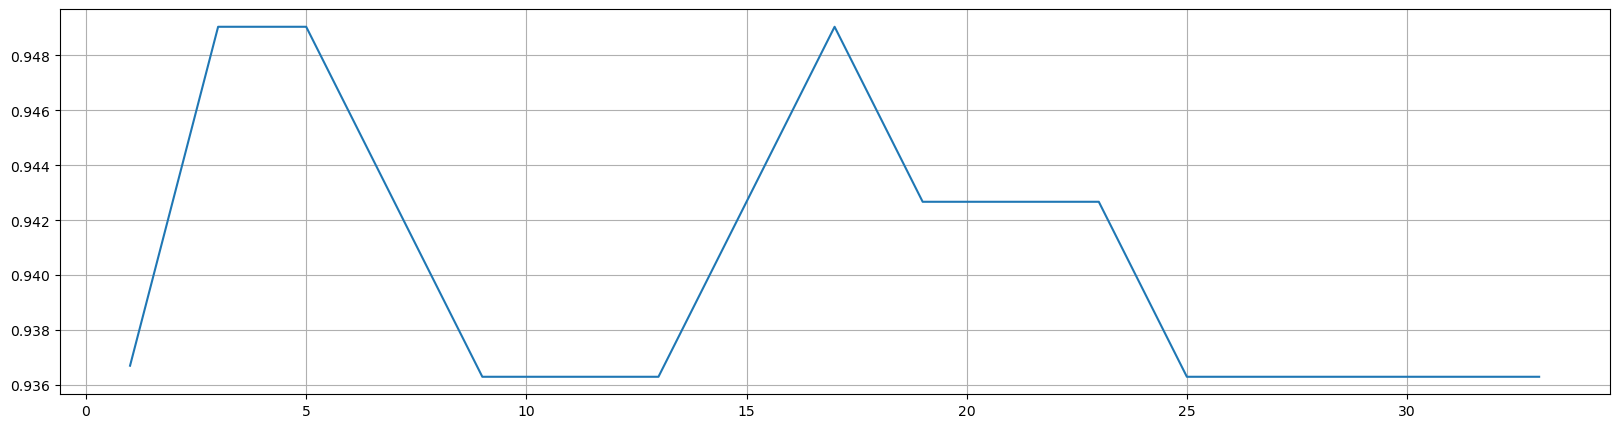

In [79]:
plt.plot(x,y)
plt.grid()
plt.show()

In [80]:
x_t = []
y_t = []
for i in range(1,35,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_test,Y_test,cv=5)
    x_t.append(i)
    y_t.append(max(score))

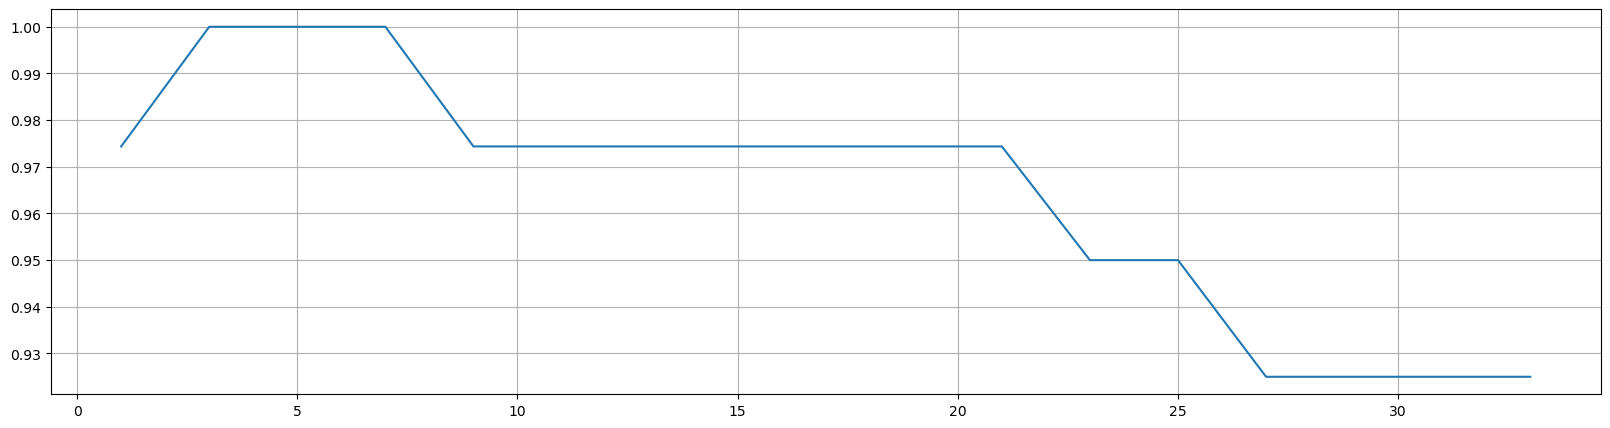

In [81]:
plt.plot(x_t,y_t)
plt.grid()
plt.show()

In [82]:
#The best value for K is between 3 - 5
#Hence using the value of K as 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [91]:
Y3_pred = knn.predict(X_test)

In [92]:
print(confusion_matrix(Y_test,Y3_pred))

[[94  1]
 [10 92]]


In [93]:
print(classification_report(Y_test,Y3_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.90      0.94       102

    accuracy                           0.94       197
   macro avg       0.95      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



In [87]:
cross_val_score(knn,X_test,Y_test,cv=5)

array([0.9       , 0.925     , 0.94871795, 1.        , 0.8974359 ])

In [88]:
cross_val_score(knn,X_train,Y_train,cv=5)

array([0.92405063, 0.91772152, 0.93630573, 0.94904459, 0.93630573])

In [94]:
accuracy_score(Y_test,Y3_pred)

0.9441624365482234

In [96]:
#Comparing the accuracy of all agorithms used. 
pd.DataFrame({'Models':['LR','DT','RF','KNN'],"ACC":[accuracy_score(Y_test,Y_pred)*100,
                                                     accuracy_score(Y_test,Y1_pred)*100,
                                               accuracy_score(Y_test,Y2_pred)*100,
                                               accuracy_score(Y_test,Y3_pred)*100]})

,Models,ACC
0,LR,93.908629
1,DT,90.862944
2,RF,93.401015
3,KNN,94.416244
